## Import libraries

In [41]:
import os
import face_recognition
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

## Get system paths

In [6]:
PRADO_PATH = os.getenv("PRADO_PATH")
assert PRADO_PATH is not None, f"Please set the env variable PRADO_PATH"
assert os.path.isdir(PRADO_PATH), "PRADO_PATH must be a dir"

## Read Prado museum dataframe

In [28]:
df = pd.read_csv(os.path.join(PRADO_PATH, "prado.csv"))
df["work_id"] = df['work_image_url'].apply(lambda x: x.split('/')[-1])
print(f"The dataframe has {len(df)} rows")
df.tail()

The dataframe has 13487 rows


,work_url,work_image_url,author,author_bio,author_url,author_id,work_title,work_subtitle,work_exposed,work_description,work_tags,technical_sheet_numero_de_catalogo,technical_sheet_autor,technical_sheet_titulo,technical_sheet_fecha,technical_sheet_tecnica,technical_sheet_soporte,technical_sheet_dimension,technical_sheet_serie,technical_sheet_procedencia,bibliography,inventory,expositions,ubication,technical_sheet_autores,technical_sheet_edicion_/_estado,technical_sheet_materia,technical_sheet_ceca,technical_sheet_autora,technical_sheet_lugar_de_produccion,work_id
13482,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Atribuido Falck, Jeremías","Gdansk/Danzig (Polonia), 1609 - Gdansk/Danzig ...",https://www.museodelprado.es/coleccion/artista...,d351c3c1-e89b-49cf-900d-24085ed1908f,Vista del monasterio de El Escorial,"1662 - 1672. Aguafuerte, Buril, Estampa ilumin...",No expuesto,"Cervera Vera (Escorial en BN no C20-a, Real Bi...",Aguafuerte;Buril;Estampa iluminada;Papel verju...,G002860,"Atribuido Falck, Jeremías",Vista del monasterio de El Escorial,1662 - 1672,Aguafuerte; Buril; Estampa iluminada,"Papel verjurado, ahuesado",Alto: 474 mm;\n\n\n\n\nAncho: 756 mm,NaN,"Colección José María Cervelló, 2003","Cervera Vera, Luis, Las Estampas y el Sumario...",Inv. Colección Cervelló.\nNúm. 166201.\n@@@\nI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c62f7f3e-3ad3-4d9e-9586-b0b389b2d032.jpg
13483,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"Atribuido Kiyonobu, Tori","1664, 1729",https://www.museodelprado.es/coleccion/artista...,9e420297-9fb9-4ef3-b128-96596d5dc191,Daifukucho [Sankai Nagoya],1697. Entalladura [madera a la fibra] sobre pa...,No expuesto,Antigua atribución a Hishikawa Moronobu. En es...,Entalladura [madera a la fibra];Papel japonés;...,G005639,"Atribuido Kiyonobu, Tori",Daifukucho [Sankai Nagoya],1697 (Genroku 10),Entalladura [madera a la fibra],Papel japonés,Alto: 172 mm;\n\n\n\n\nAncho: 240 mm,NaN,Nippon Hanga Kyokai [Socidad de Pintores y Gra...,"Bru, R., Ukiyo-e en Madrid: las estampas del ...","Inv. Dibujos siglo XIX, Casón del Buen Retiro....",DOUANES / VI-G y Cruz de Suiza\nSello.\nAnverso,Estampas japonesas en el Museo del Prado\n ...,NaN,NaN,NaN,NaN,NaN,NaN,6c28accf-e0c0-4bc0-b4c6-3fbb282bcbd8.jpg
13484,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,"García, Sergio","Madrid, 1813 - Madrid, 1855\n\nHijo de Nicolás...",https://www.museodelprado.es/coleccion/artista...,d984cdeb-020c-41f9-ae68-3285aebfa25a,Retrato de dama,"Mediados del siglo XIX. , 5,8 x 5 cm",No expuesto,Este retrato femenino es una obra de calidad e...,"Aguada de pigmentos opacos [gouache, témpera];...",O003393,"García, Sergio",Retrato de dama,Mediados del siglo XIX,"Aguada de pigmentos opacos [gouache, témpera];...",Marfil,"Alto: 5,8 cm;\n\n\n\n\nAncho: 5 cm",NaN,"Alcalá Subastas, Madrid 28 de mayo 2015; Donac...","Espinosa Martín, Mari Carmen., Iluminaciones,...",Inv. Nuevas Adquisiciones (iniciado en 1856).\...,"S.García\nManuscrito a pincel.\nAnverso, marge...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,b4126fb6-c5ac-40e3-89a1-d1578914c09b.jpg
13485,https://www.museodelprado.es/coleccion/obra-de...,https://content3.cdnprado.net/imagenes/Documen...,Anónimo,NaN,https://www.museodelprado.es/coleccion/artista...,99d7590d-7ec8-4da4-bc2f-92064214c76c,Vista del río Buñol con algunas construcciones...,Antes de 1918. Gelatina / Colodión sobre plac...,No expuesto,Vista del río Buñol a su paso por la zona del ...,Buñol y alrededores;Gelatina / Colodión;Placa ...,HF05937,Anónimo -Fotógrafo-,Vista del río Buñol con algunas construcciones...,Antes de 1918,Gelatina / Colodión,Placa de vidrio,Alto: 44 mm;\n\n\n\n\nAncho: 106 mm,Buñol y alrededores,"Donación Ana y Cecilio Ellacuria Delgado, here...","Sánchez Torija, Beatriz, Cecilio Pla y su rel...",Inv. Nuevas Adquisiciones (iniciado en 1856).\...,Elemento de arquitectura:\n\n\

## Face Detection Test

Get a random sample from the collection

In [75]:
seed = 2

In [76]:
# Get a random sample from the DataFrame
random_sample = df.sample(n=1, random_state=seed)
image_id = random_sample["work_id"].iloc[0]

image_path = os.path.join(PRADO_PATH, "images", image_id)
assert os.path.exists(image_path), f"Image path not found: '{image_path}'"

Load the image

In [77]:
image = face_recognition.load_image_file(image_path)
print(f"Image loaded! Dimensions: {image.shape}")

Image loaded! Dimensions: (1499, 1920, 3)


(-0.5, 1919.5, 1498.5, -0.5)

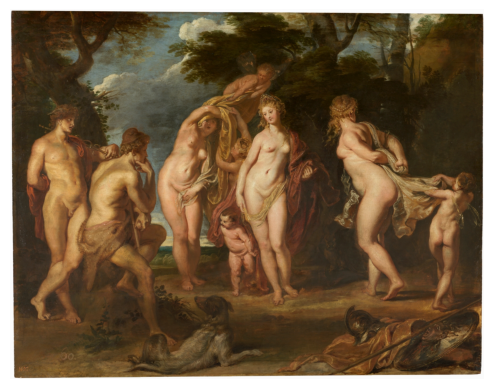

In [78]:
plt.imshow(image)
plt.axis("off")

### Extract the face locations and embeddings

In [100]:
# https://face-recognition.readthedocs.io/en/latest/face_recognition.html#face_recognition.api.face_locations
faces_locations = face_recognition.face_locations(
    image,
    model='cnn',
    number_of_times_to_upsample=1
)

faces_embeddings = face_recognition.face_encodings(
    image,
    known_face_locations=faces_locations,
    num_jitters=1,
    model="large"
)

assert len(faces_locations) == len(faces_embeddings), f"{len(faces_locations)} faces founds but {len(faces_embeddings)} embeddings generated"
print(f"{len(faces_locations)} face{'' if len(faces_locations) == 1 else 's'} found")

5 faces found


In [106]:
print(f"First face embedding shape: {faces_embeddings[0].shape}")

First face embedding shape: (128,)


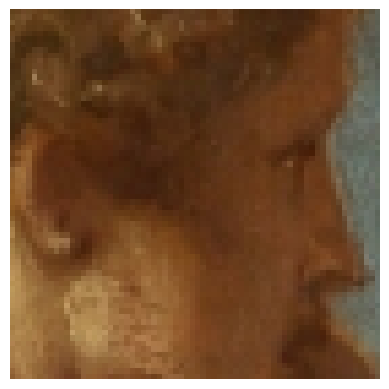

In [101]:
for indx, face_location in enumerate(faces_locations):
    # Get the location of each face in this image
    top, right, bottom, left = face_location
    # Get the face path
    face = image[top:bottom, left:right]
    # We take the face and transform it and cast into a torch format
    #face_encs = face_recognition.face_encodings(face, num_jitters=1)
    
    plt.imshow(face)
    plt.axis("off")